# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#list for holding the latitude and longitude combinations
lat_lngs = []

#list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#initiate counters
record_count = 1
set_count = 1

# Loop through the cities 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | masvingo
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | sao gabriel da cachoeira
Processing Record 5 of Set 1 | albina
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | ocos
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | vrontados
Processing Record 12 of Set 1 | maintirano
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | sosnovo-ozerskoye
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | coroata
Processing Record 21 of Set 1 | callao
Processing Record 22 of Set 1 | itoman
Pro

Processing Record 37 of Set 4 | hobyo
Processing Record 38 of Set 4 | quellon
Processing Record 39 of Set 4 | onguday
Processing Record 40 of Set 4 | tsiombe
Processing Record 41 of Set 4 | illizi
Processing Record 42 of Set 4 | fatwa
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | sitamau
Processing Record 45 of Set 4 | st. john's
Processing Record 46 of Set 4 | kerikeri
Processing Record 47 of Set 4 | camiri
Processing Record 48 of Set 4 | bardai
Processing Record 49 of Set 4 | mwatate
Processing Record 0 of Set 5 | las tablas
Processing Record 1 of Set 5 | devils lake
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | mananjary
Processing Record 4 of Set 5 | margaret river
Processing Record 5 of Set 5 | parun
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | hirara
Processing Record 8 of Set 5 | bhabhra
Processing Record 9 of Set 5 | kamiichi
Processing Record 10 of Set 5 | qarqaraly
Processing Record 11 of 

Processing Record 31 of Set 8 | praia da vitoria
Processing Record 32 of Set 8 | east london
Processing Record 33 of Set 8 | anloga
Processing Record 34 of Set 8 | santa rita do sapucai
Processing Record 35 of Set 8 | verkhotur'ye
Processing Record 36 of Set 8 | hinton
Processing Record 37 of Set 8 | flin flon
Processing Record 38 of Set 8 | kuusamo
Processing Record 39 of Set 8 | nevada
Processing Record 40 of Set 8 | silivri
Processing Record 41 of Set 8 | tofol
Processing Record 42 of Set 8 | pittsburg
Processing Record 43 of Set 8 | salinas
Processing Record 44 of Set 8 | bigadic
Processing Record 45 of Set 8 | tralee
Processing Record 46 of Set 8 | ormara
Processing Record 47 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 48 of Set 8 | cascais
Processing Record 49 of Set 8 | nadym
Processing Record 0 of Set 9 | tangalle
Processing Record 1 of Set 9 | tremseh
City not found. Skipping...
Processing Record 2 of Set 9 | vorkuta
Processing Record 3 of Set 9 | ga

Processing Record 16 of Set 12 | mezhdurechensk
Processing Record 17 of Set 12 | peniche
Processing Record 18 of Set 12 | somotillo
Processing Record 19 of Set 12 | bechar
Processing Record 20 of Set 12 | bumba
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | mandan
Processing Record 23 of Set 12 | alliance
Processing Record 24 of Set 12 | batam
City not found. Skipping...
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | vrangel'
Processing Record 27 of Set 12 | muscat
Processing Record 28 of Set 12 | taroudant
Processing Record 29 of Set 12 | sisimiut
Processing Record 30 of Set 12 | jayapura
Processing Record 31 of Set 12 | chopinzinho
Processing Record 32 of Set 12 | kulhudhuffushi
Processing Record 33 of Set 12 | sur
Processing Record 34 of Set 12 | aghstafa
Processing Record 35 of Set 12 | asau
Processing Record 36 of Set 12 | iwanai
Processing Record 37 of Set 12 | kollam
Processing Record 38 of Set 12 | el alto
Processing Rec

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,masvingo,-20.0637,30.8277,23.03,25,0,5.21,ZW,1726449518
1,ilulissat,69.2167,-51.1000,-1.47,81,100,2.33,GL,1726449520
2,alice springs,-23.7000,133.8833,14.75,20,100,6.69,AU,1726449275
3,sao gabriel da cachoeira,-0.1303,-67.0892,26.33,72,6,1.07,BR,1726449522
4,albina,5.5000,-54.0500,24.50,86,80,2.03,SR,1726449523


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masvingo,-20.0637,30.8277,23.03,25,0,5.21,ZW,1726449518
1,ilulissat,69.2167,-51.1000,-1.47,81,100,2.33,GL,1726449520
2,alice springs,-23.7000,133.8833,14.75,20,100,6.69,AU,1726449275
3,sao gabriel da cachoeira,-0.1303,-67.0892,26.33,72,6,1.07,BR,1726449522
4,albina,5.5000,-54.0500,24.50,86,80,2.03,SR,1726449523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

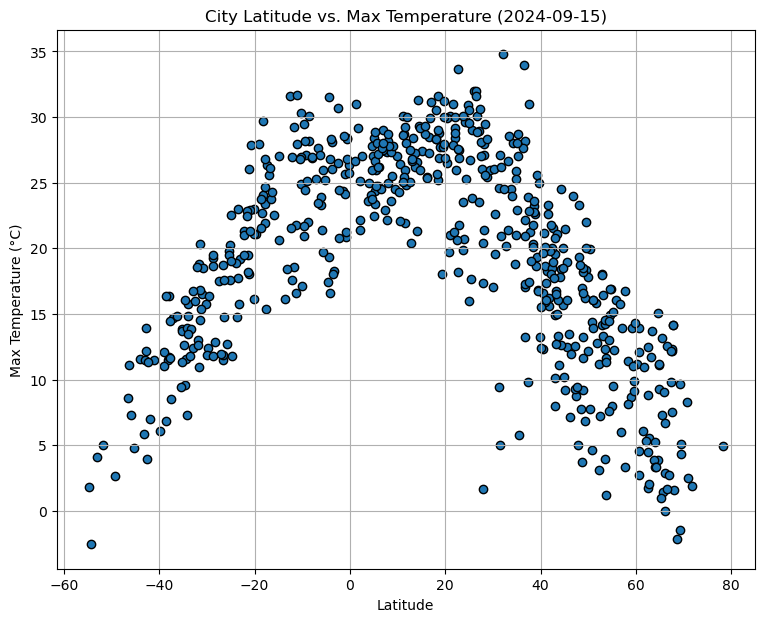

In [21]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

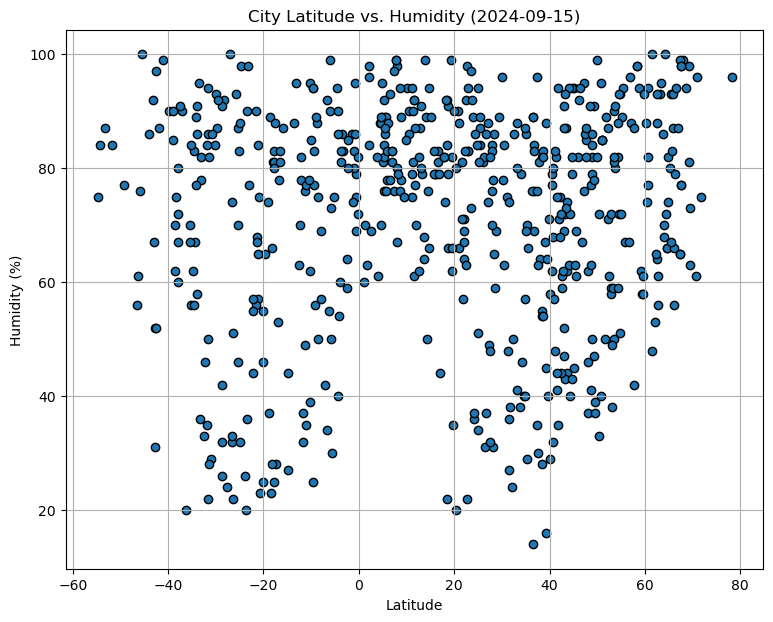

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

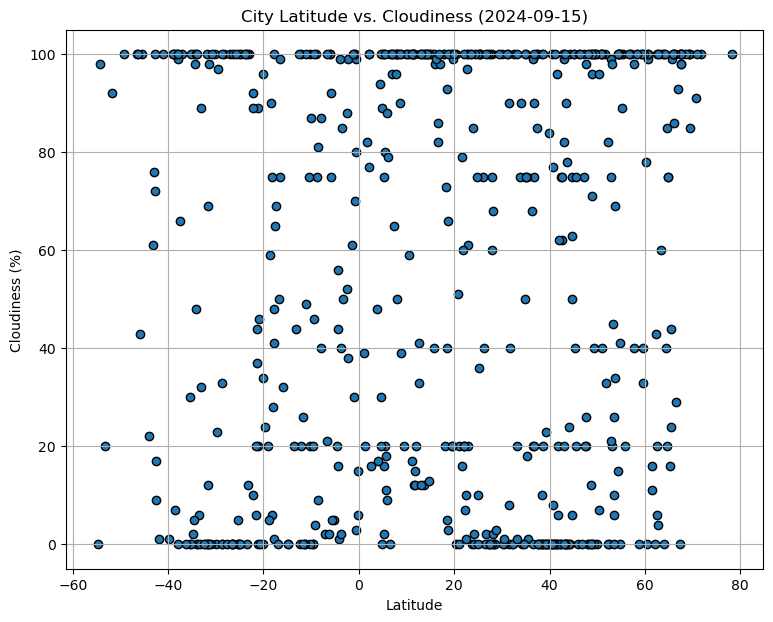

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

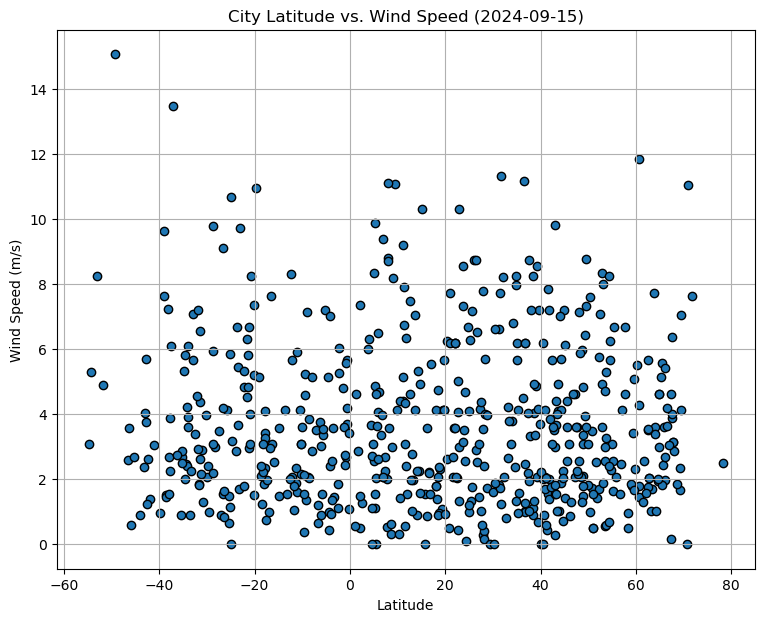

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Print r-squared 
    print(f"The r^2-value is: {r_value**2}")
    
    # Create the scatter plot
    plt.figure(figsize=(9,7))
    plt.scatter(x_values, y_values, edgecolors="black")

    # Plot the regression line
    plt.plot(x_values, regress_values, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)


    # Show the plot
    plt.legend()
    plt.show()


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-1.47,81,100,2.33,GL,1726449520
4,albina,5.5000,-54.0500,24.50,86,80,2.03,SR,1726449523
7,nemuro,43.3236,145.5750,16.74,72,0,3.66,JP,1726449240
8,ocos,14.5094,-92.1933,29.30,76,100,2.25,GT,1726449527
9,ribeira grande,38.5167,-28.7000,23.21,82,100,4.02,PT,1726449528


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masvingo,-20.0637,30.8277,23.03,25,0,5.21,ZW,1726449518
2,alice springs,-23.7000,133.8833,14.75,20,100,6.69,AU,1726449275
3,sao gabriel da cachoeira,-0.1303,-67.0892,26.33,72,6,1.07,BR,1726449522
5,ushuaia,-54.8000,-68.3000,1.81,75,0,3.09,AR,1726449524
6,adamstown,-25.0660,-130.1015,20.22,83,100,5.86,PN,1726449525


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.647260997904524


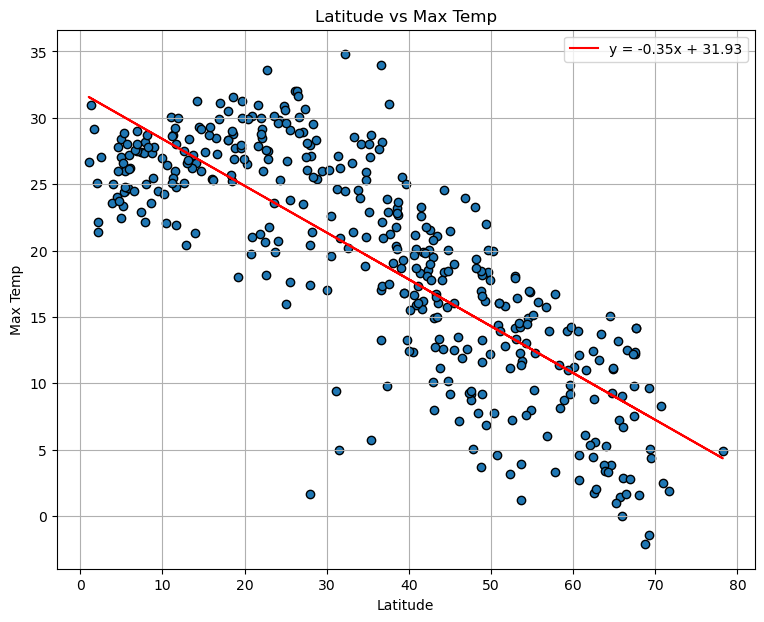

In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

The r^2-value is: 0.697792813188733


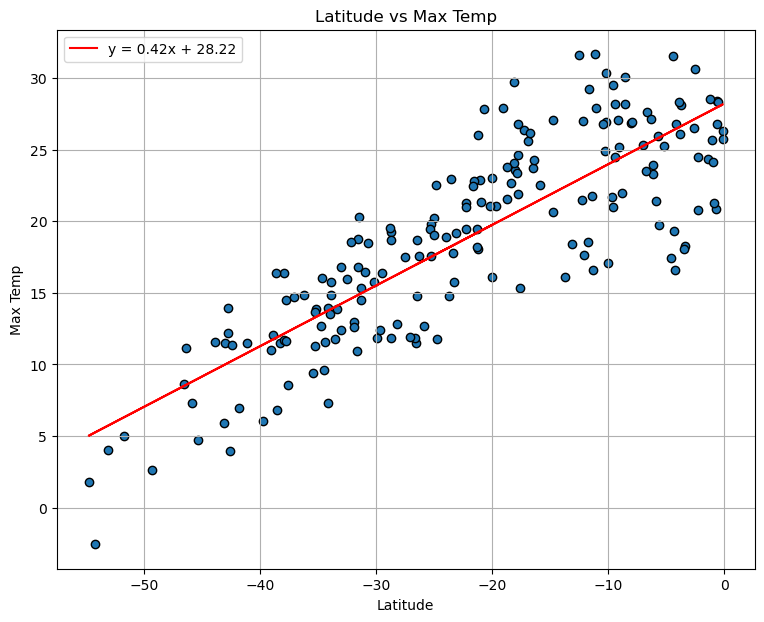

In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

**Discussion about the linear relationship:** In the northern hemisphere, latitude is negatively correlated to the max temperature which is demonstrated by the regression line equation of y=-0.35x+31.93. In the southern hemisphere, latitude is positively correlated to the max temperature which is demonstrated by the regression line equation of y=0.42x+28.22.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0048749807994639405


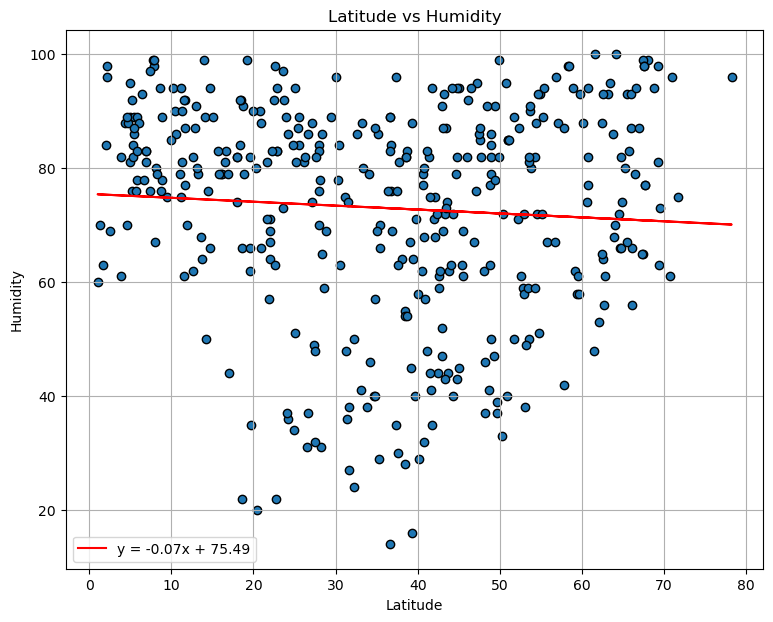

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

The r^2-value is: 0.0001208084024063359


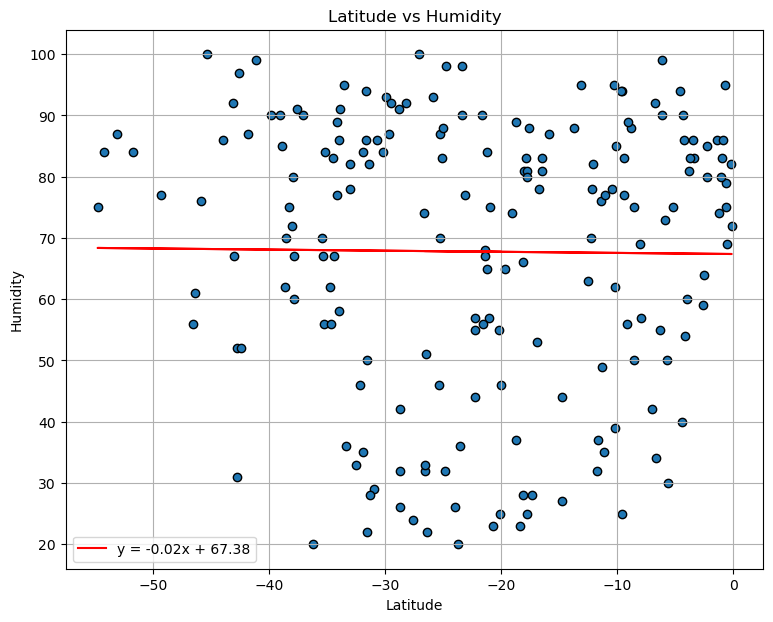

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

**Discussion about the linear relationship:** In the northern hemisphere, latitude has a very weak negative correlation with humidity which is demonstrated by the regression line equation of y=-0.07x+75.43. In the southern hemisphere, latitude is has an even weaker negative correlation with humidity which is demonstrated by the regression line equation of y=-0.02x+67.38.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00017782508161072322


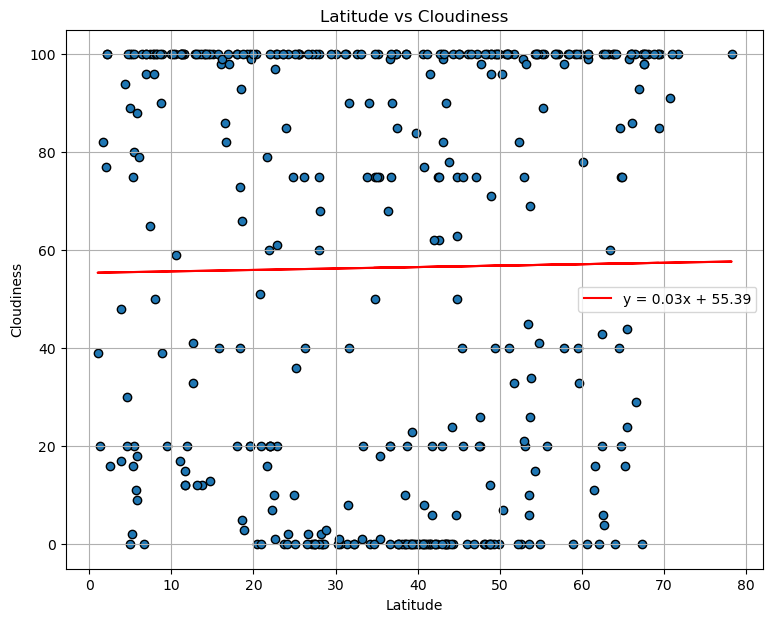

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

The r^2-value is: 0.001502253979313747


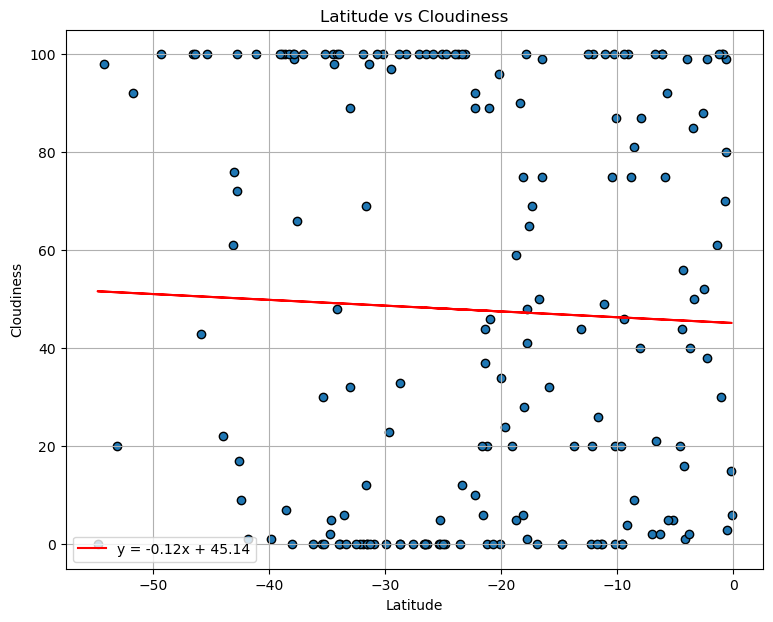

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

**Discussion about the linear relationship:** In the northern hemisphere, latitude has a very weak positive correlation with cloudiness which is demonstrated by the regression line equation of y=0.03x+55.39. In the southern hemisphere, latitude has a slightly stronger (but still weak) negative correlation with humidity which is demonstrated by the regression line equation of y=-0.12x+45.14.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0016549522755314502


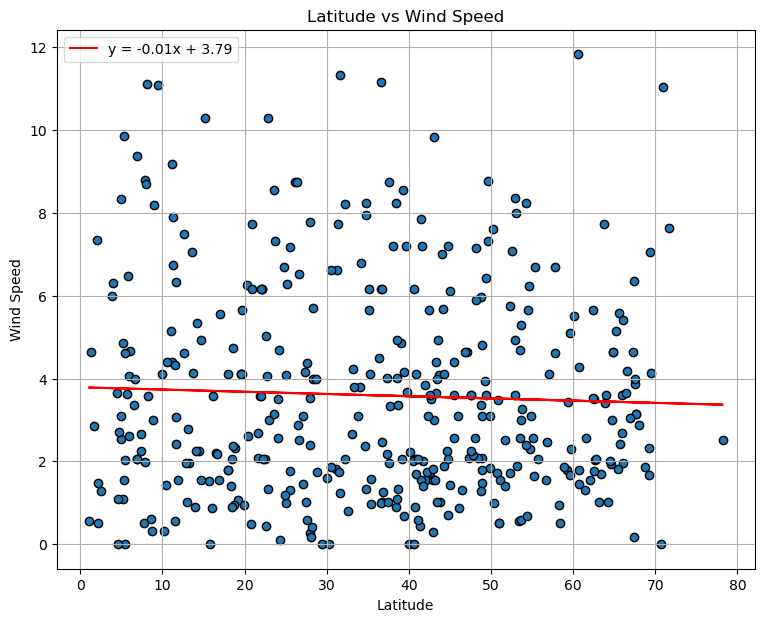

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

The r^2-value is: 0.020334091151906465


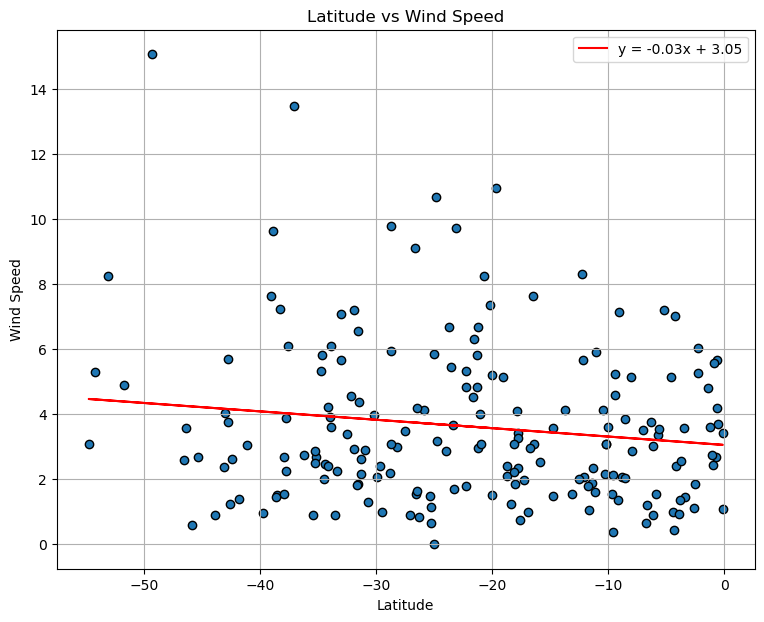

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:** In the northern hemisphere, latitude has an extremely weak negative correlation with Wind Speed which is demonstrated by the regression line equation of y=-0.01x+3.79. In the southern hemisphere, latitude has a slightly stronger negative correlation with Wind Speed which is demonstrated by the regression line equation of y=-0.03x+3.05.